In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('MSFT.csv',index_col='date')
#df.index.freq='MS'

In [81]:
df.head()

,Open,High,Low,closing_price,Adj Close,Volume
date,,,,,,
13/03/1986,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
14/03/1986,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
17/03/1986,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
18/03/1986,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
19/03/1986,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


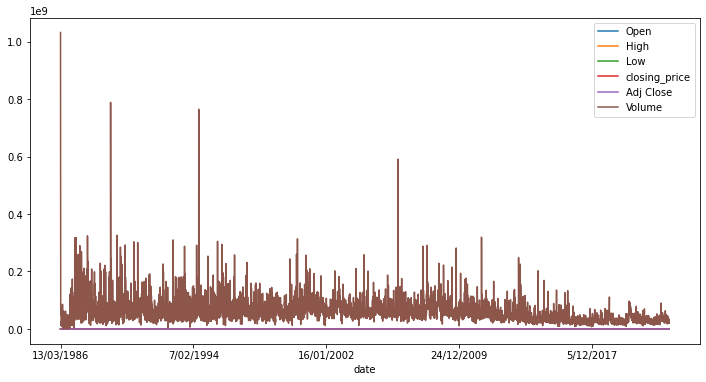

In [82]:
df.plot(figsize=(12,6))

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [84]:
#results = seasonal_decompose(df['closing_price'])
#results.plot();

In [85]:
len(df)

9165

In [86]:
#df.drop(['trading_code','last_traded_price','high','low','opening_price','yesterdays_closing_price','trade','value_mn','volume'],axis=1)
df

,Open,High,Low,closing_price,Adj Close,Volume
date,,,,,,
13/03/1986,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
14/03/1986,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
17/03/1986,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
18/03/1986,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
19/03/1986,0.099826,0.100694,0.097222,0.098090,0.061655,47894400
...,...,...,...,...,...,...
18/07/2022,259.750000,260.839996,253.300003,254.250000,254.250000,20975000
19/07/2022,257.579987,259.720001,253.679993,259.529999,259.529999,25012600
20/07/2022,259.899994,264.869995,258.910004,262.269989,262.269989,22788300


In [87]:
#df.drop(df.columns[[0,1, 2, 3, 4,6, 7, 8,9]], axis=1, inplace=True)
df.drop(df.columns[[0,1, 2, 4, 5]], axis=1, inplace=True)

In [88]:
df

,closing_price
date,
13/03/1986,0.097222
14/03/1986,0.100694
17/03/1986,0.102431
18/03/1986,0.099826
19/03/1986,0.098090
...,...
18/07/2022,254.250000
19/07/2022,259.529999
20/07/2022,262.269989


In [89]:
train = df.iloc[:-100]
test = df.iloc[-100:]

In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [91]:
df.head(),df.tail()

(            closing_price
 date                     
 13/03/1986       0.097222
 14/03/1986       0.100694
 17/03/1986       0.102431
 18/03/1986       0.099826
 19/03/1986       0.098090,             closing_price
 date                     
 18/07/2022     254.250000
 19/07/2022     259.529999
 20/07/2022     262.269989
 21/07/2022     264.839996
 22/07/2022     260.359985)

In [92]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [93]:
scaled_train[:10]

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       [2.78351354e-05],
       [2.27742017e-05],
       [1.51828011e-05],
       [7.59140057e-06],
       [0.00000000e+00],
       [5.06093371e-06],
       [1.26523343e-05]])

In [94]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [95]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [96]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[2.02437349e-05 3.03656023e-05 3.54294513e-05]
Predict this y: 
 [[2.78351354e-05]]


In [97]:
X.shape

(1, 3, 1)

In [98]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [100]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [101]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [102]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10
9053/9053 [==============================] - 54s 6ms/step - loss: 3.0997e-04
Epoch 2/10
9053/9053 [==============================] - 52s 6ms/step - loss: 1.2004e-04
Epoch 3/10
9053/9053 [==============================] - 55s 6ms/step - loss: 6.0831e-05
Epoch 4/10
9053/9053 [==============================] - 54s 6ms/step - loss: 4.5829e-05
Epoch 5/10
9053/9053 [==============================] - 55s 6ms/step - loss: 3.9762e-05
Epoch 6/10
9053/9053 [==============================] - 59s 7ms/step - loss: 4.0620e-05
Epoch 7/10
9053/9053 [==============================] - 66s 7ms/step - loss: 3.6039e-05
Epoch 8/10
9053/9053 [==============================] - 63s 7ms/step - loss: 3.7048e-05
Epoch 9/10
9053/9053 [==============================] - 65s 7ms/step - loss: 3.3391e-05
Epoch 10/10
9053/9053 [==============================] - 53s 6ms/step - loss: 3.4126e-05


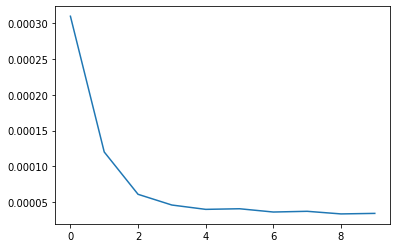

In [103]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [104]:
last_train_batch = scaled_train[-12:]

In [105]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [106]:
model.predict(last_train_batch)

array([[0.87247777]], dtype=float32)

In [107]:
scaled_test[0]

array([0.85959998])

In [108]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [109]:
test_predictions

[array([0.87247777], dtype=float32),
 array([0.8713625], dtype=float32),
 array([0.8696471], dtype=float32),
 array([0.8675199], dtype=float32),
 array([0.8651396], dtype=float32),
 array([0.8625957], dtype=float32),
 array([0.85996014], dtype=float32),
 array([0.85725224], dtype=float32),
 array([0.854512], dtype=float32),
 array([0.8517547], dtype=float32),
 array([0.8489942], dtype=float32),
 array([0.84623784], dtype=float32),
 array([0.8434902], dtype=float32),
 array([0.84075385], dtype=float32),
 array([0.83803034], dtype=float32),
 array([0.83532065], dtype=float32),
 array([0.83262515], dtype=float32),
 array([0.8299441], dtype=float32),
 array([0.82727766], dtype=float32),
 array([0.82462585], dtype=float32),
 array([0.8219885], dtype=float32),
 array([0.81936556], dtype=float32),
 array([0.81675696], dtype=float32),
 array([0.81416255], dtype=float32),
 array([0.811582], dtype=float32),
 array([0.80901545], dtype=float32),
 array([0.80646265], dtype=float32),
 array([0.80392

In [110]:
test.head()

,closing_price
date,
1/03/2022,294.950012
2/03/2022,300.190002
3/03/2022,295.920013
4/03/2022,289.859985
7/03/2022,278.910004


In [111]:
true_predictions = scaler.inverse_transform(test_predictions)

In [112]:
test['predicted_closing_price'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
test.head()

,closing_price,predicted_closing_price
date,,
1/03/2022,294.950012,299.367347
2/03/2022,300.190002,298.984790
3/03/2022,295.920013,298.396367
4/03/2022,289.859985,297.666705
7/03/2022,278.910004,296.850211


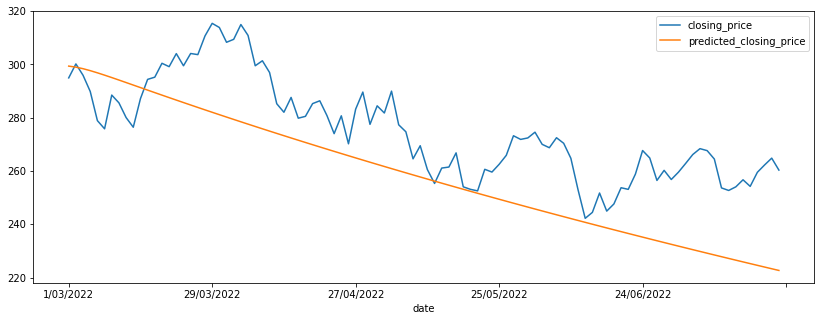

In [114]:
test.plot(figsize=(14,5))

In [115]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['closing_price'],test['predicted_closing_price']))
print(rmse)

21.49283981872784
